<a href="https://colab.research.google.com/github/ChastityB/Stroke_Predictions_Dataset/blob/main/Stroke_Predictions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Predictions Dataset

Chastity Benton 03/2022

##Task: To create a model to determine if a patient is likely to get a stroke based on the parameters provided.  

##Data Dictionary

Column Name | Data Type | Description
------------|-----------|------------
id | Integer | Unique identifier
gender | Object | "Male", "Female", "Other"
age | Float | Age of patient
hypertension |Integer | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart Disease | Integer | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married | Object | "No" or "Yes"
work_type | Object |  "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type | Object | "Rural" or "Urban"
avg_glucose_level | Float | average glucose level in blood
bmi | Float | body mass index
smoking_status | Object | "formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke | Integer | 1 if the patient had a stroke or 0 if not, target

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

##Load Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset

In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/02 Machine Learning/03 Week 3: Classification Models/Assignment Exercise/Project Part 2/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Inspect Data/Clean Up Data

###Explore the data

In [ ]:
#Explore the data (dtypes, number of rows, number of columns, and null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset matches the dictionary. bmi has missing values. 

In [ ]:
#Checking statistical analysis for any irregularities
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Although the min of age looks suspiciously low, this dataset has patients as young as 8 days old. 

In [ ]:
#Determining if there are any duplicates
df.duplicated().any()

False

There are no duplicates in this data. 

In [ ]:
#ensure column labels have no errors

#instantiate the datatypes
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
print(str_cols)

num_cols = data_types[data_types=='float64'].index
print(f'\n{num_cols}')

int_cols = data_types[data_types=='int64'].index
print(f'\n{int_cols}\n')

#explore each univariate distribution object in a loop
for col in str_cols:
  print(f'-{col}:')
  print(df[col].value_counts())
  print('\n\n')

#explore each univariate distribution float64 in a loop
for ncol in num_cols:
  print(f'--{ncol}:')
  print(df[ncol].value_counts())
  print('\n\n')

#explore each univariate distribution int64 in a loop
for intcol in int_cols:
  print(f'--{intcol}:')
  print(df[intcol].value_counts())
  print('\n\n')

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

Index(['id', 'hypertension', 'heart_disease', 'stroke'], dtype='object')

-gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



-ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64



-work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



-Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



-smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



--age:
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64



--avg_glucose_l

There is only 1 other in gender. This can be dropped. 

Residence_type is the only column with a capital letter. I will make sure this matches the lowercase pattern of the other columns

id column contains unique values and does not pertain to the data. This column can be dropped. 

In [ ]:
#determining where in the data is 'Other'
df.loc[df['gender']== 'Other']

#dropping single Gender == Other in the data
df = df.drop(index=3116)

#ensure it was dropped
df.loc[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
#convert columns to lowercase 
df.columns = df.columns.str.lower()

#ensure it worked
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#drop id column as it does not pertain to the predictive data
df = df.drop(columns = 'id')

#ensure the code worked
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###Explore Data Summary

* bmi has missing values. These values will be replaced with the median using SimpleImputer once we reach preprocessing for machine learning

* 'Other' in gender was dropped. 

* to facilitate data, ensured all columns were lowercased, since Residence type was the only one uppercased. 

##Exploratory Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cb1e63990>,
      dtype=object)

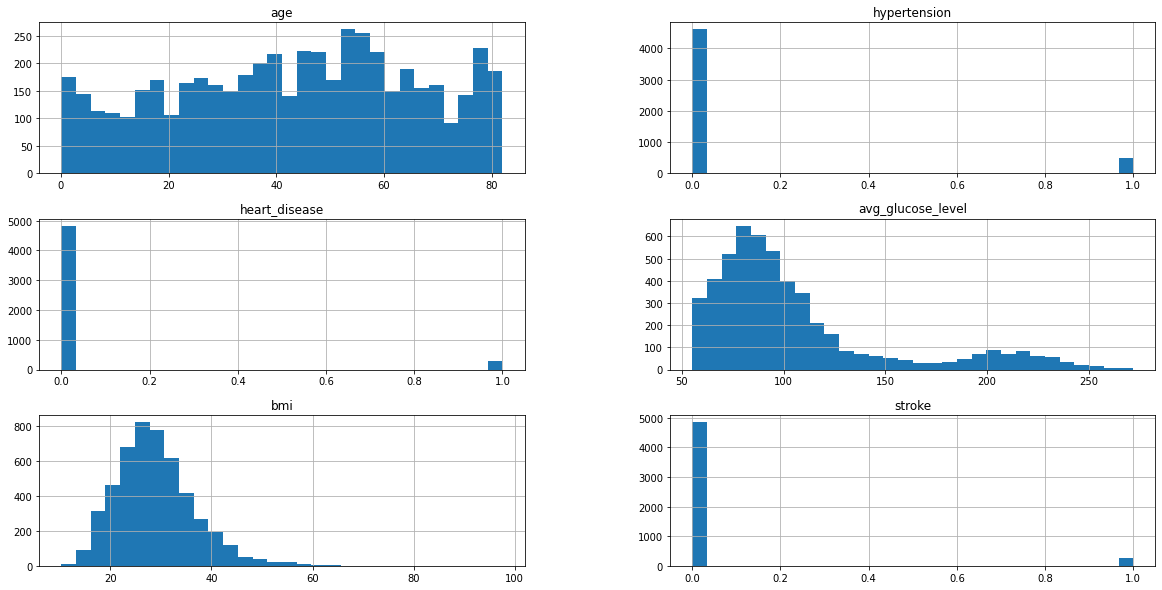

In [ ]:
#histogram of numerical data
df.hist(bins=30, figsize=(20,10))

* age is evenly distributed 
* avg_glucose_level and bmi are skewed to the left 

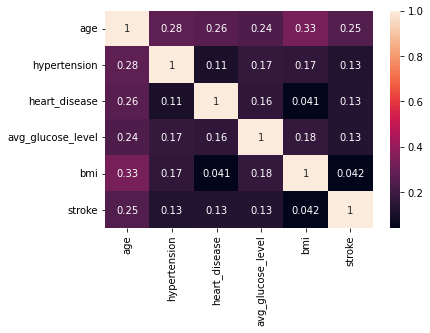

In [ ]:
#Explore the relationships between variables and bivariate 
sns.heatmap(df.corr(), annot=True);

* Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
* All categories have a positive correlation to each other (no negatives)

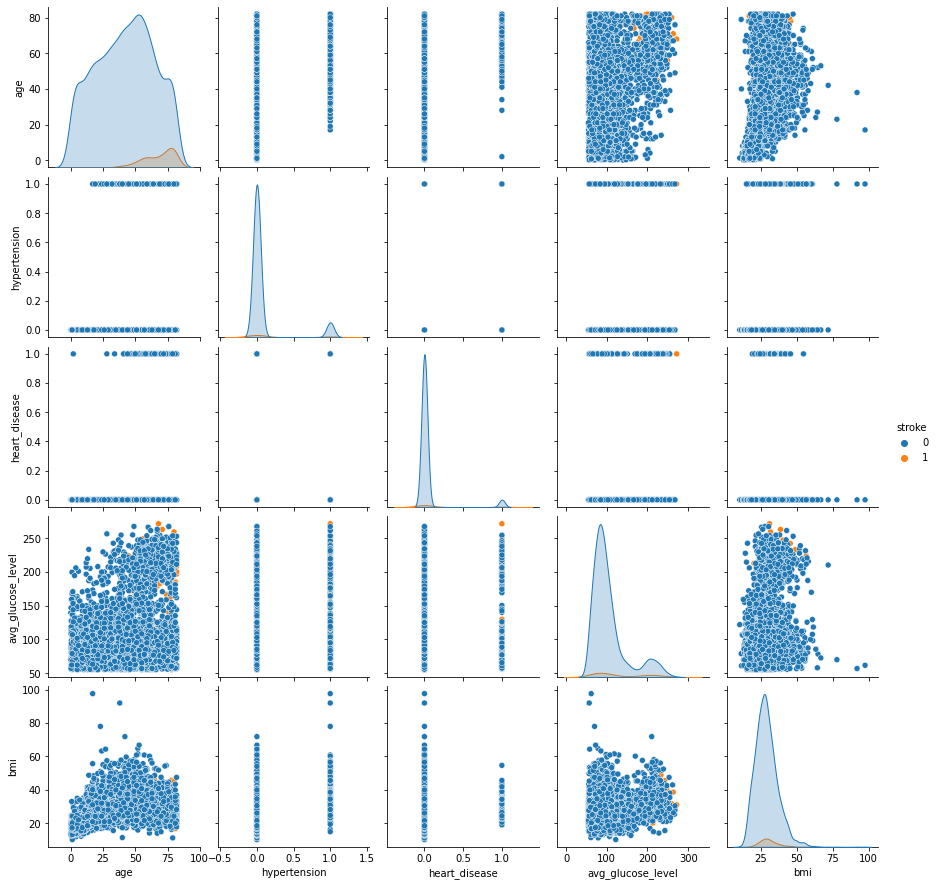

In [ ]:
#Explore the best set of features to explain relationship between two variables
sns.pairplot(df, hue='stroke')

* Based on the chart above we can see that the data is highly unbalanced. 

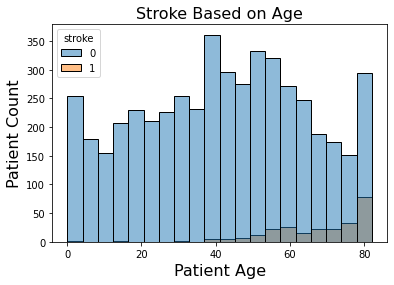

In [ ]:
sns.histplot(data=df, x='age', hue='stroke')
plt.title('Stroke Based on Age', fontsize=16)
plt.xlabel('Patient Age', fontsize=16)
plt.ylabel('Patient Count', fontsize=16);

* Chances of stroke increase as you age, but people, according to this data, generally do not have strokes. 

###Summary of Exploratory Data

* Age is evenly distributed
* avg_glucose_level and bmi are skewed to the left
* Age has correlations to bmi, hypertension, heart_disease, avg_gluclose_level, and stroke
* All categories have a positive correlation to each other (no negatives)
* Data is highly unbalanced
* Changes of stroke increase as you age, but people, according to this data, generally do not have strokes. 